In [10]:
import pandas as pd
from sklearn.feature_selection import chi2

## Import datafiles

In [5]:
match_overview_train = pd.read_csv('MatchOverviewTraining.csv')
match_detail = pd.read_csv('MatchDetail.csv')

In [6]:
match_overview_train.describe()

,match_id,hero_1,hero_2,hero_3,hero_4,hero_5,hero_6,hero_7,hero_8,hero_9,hero_10,first_5_won
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000
mean,2.489612e+09,49.183100,48.933600,49.652700,49.53620,49.466700,49.485200,50.534800,49.966300,49.85270,49.310100,0.5837
std,7.936279e+05,32.482794,32.343791,32.431618,32.54338,32.401918,32.722048,32.773959,32.515035,32.59813,32.495559,0.492969
min,2.488126e+09,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,False
25%,2.489866e+09,20.000000,20.000000,21.000000,21.00000,21.000000,20.000000,21.000000,21.000000,21.00000,20.000000,0
50%,2.490009e+09,44.000000,45.000000,46.000000,46.00000,45.000000,45.000000,48.000000,46.000000,46.00000,45.000000,1
75%,2.490112e+09,74.000000,74.000000,74.000000,74.00000,74.000000,74.000000,75.000000,74.000000,74.00000,74.000000,1
max,2.490307e+09,113.000000,113.000000,113.000000,113.00000,113.000000,113.000000,113.000000,113.000000,113.00000,113.000000,True


#### Here, the target variable is `first_5_won`. We are required to predict this using all other features available, save match_id, which is just for indexing purposes.

In [7]:
match_detail.describe()

,match_id,hero_id,player_id,e_0,e_5,e_10,e_15,e_20,e_25,e_30,...,g_0,g_5,g_10,g_15,g_20,g_25,g_30,g_35,g_40,g_45
count,2.023190e+05,202318.000000,202318.000000,202318.000000,202318.000000,202318.000000,202318.000000,202318.000000,202318.000000,202318.000000,...,202318.000000,202318.000000,202318.000000,202318.000000,202318.000000,202318.000000,202318.000000,202318.000000,202318.00000,202318.000000
mean,2.493588e+09,49.494607,4.499960,3.198509,1230.102631,2671.137506,4368.629875,6376.783306,8601.520903,10124.943075,...,22.281151,1137.079637,2425.889486,3995.387103,5793.826155,7722.704050,8990.296197,8037.615694,4828.55522,2432.618274
std,5.937899e+06,32.597969,2.872275,22.053867,476.859846,1021.431117,1670.123871,2551.720520,3745.258821,5732.538580,...,73.826014,456.678362,938.364517,1549.658798,2312.589269,3354.010529,5050.817617,7150.569957,7611.67297,6388.078102
min,2.488126e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.490015e+09,20.000000,2.000000,0.000000,911.000000,2057.000000,3459.000000,5047.000000,6740.000000,7602.250000,...,1.000000,832.000000,1864.000000,3159.000000,4617.000000,6109.000000,6980.000000,0.000000,0.00000,0.000000
50%,2.490259e+09,44.000000,4.000000,0.000000,1140.000000,2606.000000,4376.000000,6413.000000,8696.000000,10734.000000,...,1.000000,1075.000000,2379.000000,3967.000000,5770.000000,7712.000000,9464.000000,9559.000000,0.00000,0.000000
75%,2.502922e+09,74.000000,7.000000,0.000000,1565.000000,3344.000000,5400.000000,7914.000000,10813.000000,13711.000000,...,2.000000,1348.000000,2944.000000,4853.000000,7071.000000,9566.000000,12002.000000,13421.000000,11658.00000,0.000000
max,2.503050e+09,113.000000,9.000000,600.000000,4772.000000,7661.000000,14982.000000,30538.000000,32496.000000,33413.000000,...,1718.000000,11636.000000,22563.000000,23098.000000,28425.000000,31261.000000,45115.000000,42163.000000,50237.00000,57349.000000


## Choosing features
## 1. Filter methods
### 1.1 Chi-squared test for feature selection
A higher value of chi_square indicates that feature is dependent on the target variable.

In [28]:
X = match_overview_train.ix[:,1:11] # Take all columns except match_id and first_5_won
y = match_overview_train.ix[:,11] # Take just the target variable: first_5_won
[chi,pval] = chi2(X,y)

In [30]:
chi_results = pd.DataFrame(chi,pval)
chi_results

,0
1.987312e-52,232.187633
6.311856e-35,152.007636
1.128495e-43,192.060873
2.746249e-06,21.986151
3.422000e-02,4.483678
3.490464e-16,66.504779
8.209191e-37,160.637791
2.593346e-19,80.725645
4.401750e-13,52.455204
1.071557e-30,132.662686


*p-values of greater than 0.05 (or 5% I think) are statistically significant* 


Judging by the p-value, we have the following features that affect the target variable:


| feature | chi_value | p_value |
|---------|---------|----------|
| hero_1 | 1.9e-52 | 232 |
| hero_3 | 1.1e-43 | 192 |
| hero_7 | 8.2e-37 | 160 |
| hero_2 | 6.3e-35 | 152 |
| hero_10 | 1.07e-30 | 132 |

### 1.2 Information gain (using random forest) to rank features 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,criterion='entropy')

forest.fit(X,y)
importances = forest.feature_importances_

In [32]:
print('Feature entropy:')
for f in range(X.shape[1]):
    print('feature %s (%f)' % (X.columns[f],importances[f]))

Feature entropy:
feature hero_1 (0.100132)
feature hero_2 (0.100266)
feature hero_3 (0.099889)
feature hero_4 (0.099551)
feature hero_5 (0.099809)
feature hero_6 (0.100179)
feature hero_7 (0.099830)
feature hero_8 (0.099792)
feature hero_9 (0.099991)
feature hero_10 (0.100559)


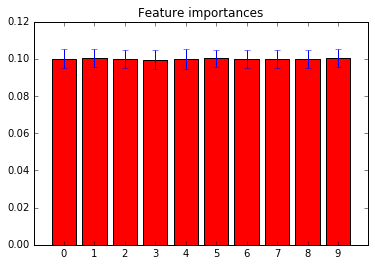

In [37]:
%matplotlib inline
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances,
       color="r", yerr=std, align="center")
plt.xticks(range(X.shape[1]))
plt.xlim([-1, X.shape[1]])
plt.show()

`ExtraTreesClassifier` did not provide with any useful feature ranking since the ranks are very close to each other. Even then, below features are common to both:
* hero_1
* hero_2 
* hero_3
* hero_7
* hero_10

## 2. Wrapper methods
### 2.1 Recursive Feature Elimination
Refer: http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/


*NOTE: The stability of RFE depends heavily on the type of model that is used for feature ranking at each iteration.*

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [43]:
#use linear regression as the model
estimator = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(estimator, n_features_to_select=1)
rfe.fit(X,y)
names = X.columns
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'hero_1'), (2, 'hero_3'), (3, 'hero_2'), (4, 'hero_7'), (5, 'hero_10'), (6, 'hero_8'), (7, 'hero_6'), (8, 'hero_9'), (9, 'hero_4'), (10, 'hero_5')]


In [ ]:
#use linear regression as the model
estimator = SVR(kernel='linear')
#rank all features, i.e continue the elimination until the last one
rfe = RFE(estimator, n_features_to_select=1)
rfe.fit(X,y)
names = X.columns
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

## 3. Regularization
### 3.1 L2 feature regularization
Refer: http://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/